In [1]:
from imports import *

Welcome to JupyROOT 6.28/10


In [2]:
def getNIEL(file):
    """Read tab-separated output from testNRyield.cc into Pandas.
       Column headings are on second line, with "xyz" names of the
       different G4CMPxyzNIEL models.  Energy units are captured
       separately from the first line of the file."""
    nieldata = pd.read_csv(file,skiprows=1,sep='\t')
    units = open(file).readline().split()[-1]
    return nieldata, units

In [36]:
datadir="data/NIEL-calc/"
names = [ "develop", "G4CMP436", "keV-G4CMP436", "alpha_G4CMP436", "alpha-keV_G4CMP436" ]
data = {}
for n in names:
    sep = "-" if n[:5]=="alpha" else "_"
    file = f"{datadir}NIEL{sep}{n}.txt"

    tbl,units = getNIEL(file)
    data.update({n: {"NIEL": tbl, "Units":units}})

In [ ]:
energy = data["develop"]["NIEL"]["Energy"]
lewin = data["develop"]["NIEL"]["LewinSmith"]
plt.plot(energy,lewin,"-")

In [39]:
def overlayFile(name):
    """Create plot showing all of the NIEL calculations for a given
       configuration, to compare."""
    if name not in data: return
        
    energy = data[name]["NIEL"]["Energy"]
    units = data[name]["Units"]
    for niel in data[name]["NIEL"]:
        if niel == "Energy": continue
        plt.plot("Energy",niel,"-",data=data[name]["NIEL"],label=niel)
        
    plt.title(f"NIEL models for {name}")
    plt.xlabel(f"Energy [{units}]")
    plt.ylabel(f"Ionization Yield [fraction]")
    plt.legend()
    plt.savefig(f"{datadir}{name}_NIEL.png")

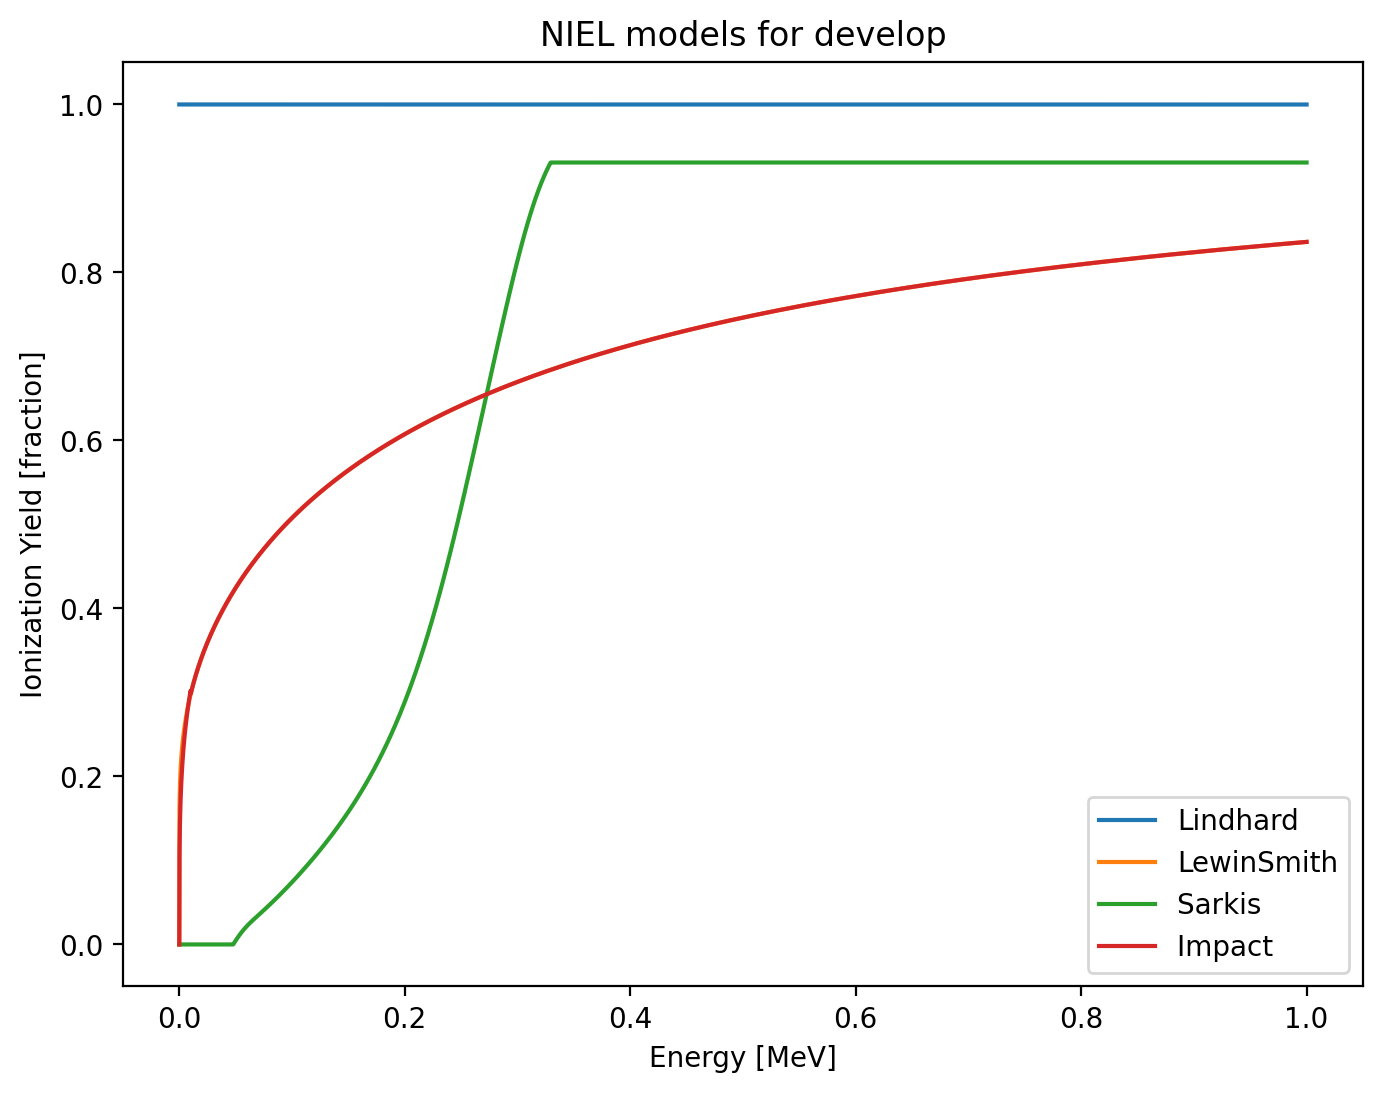

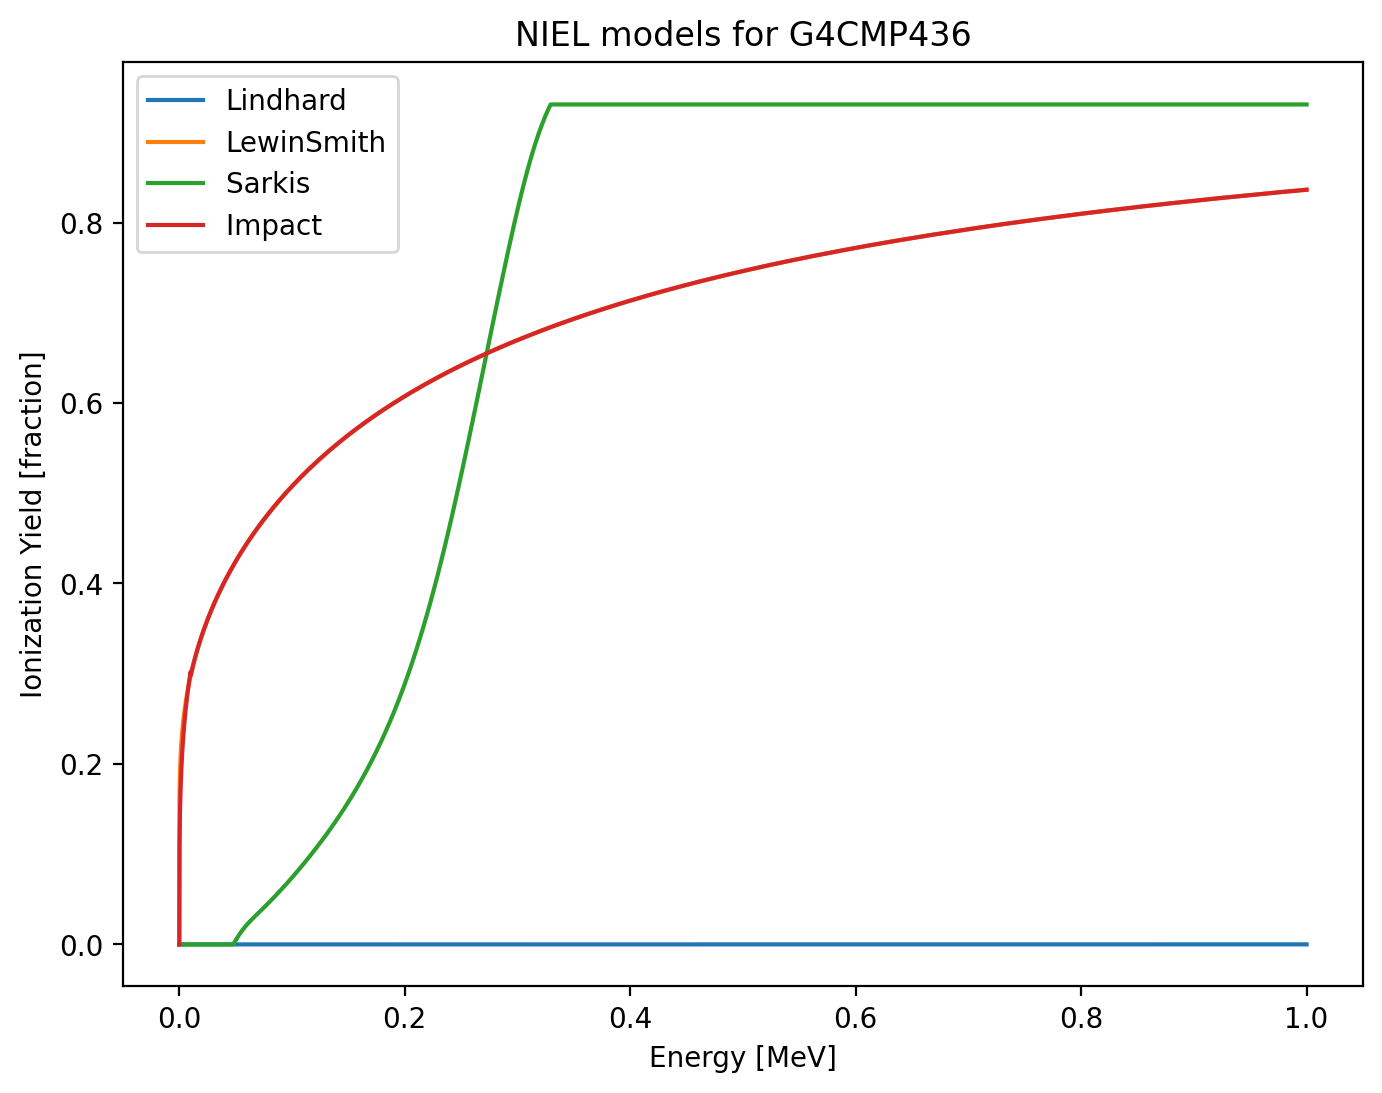

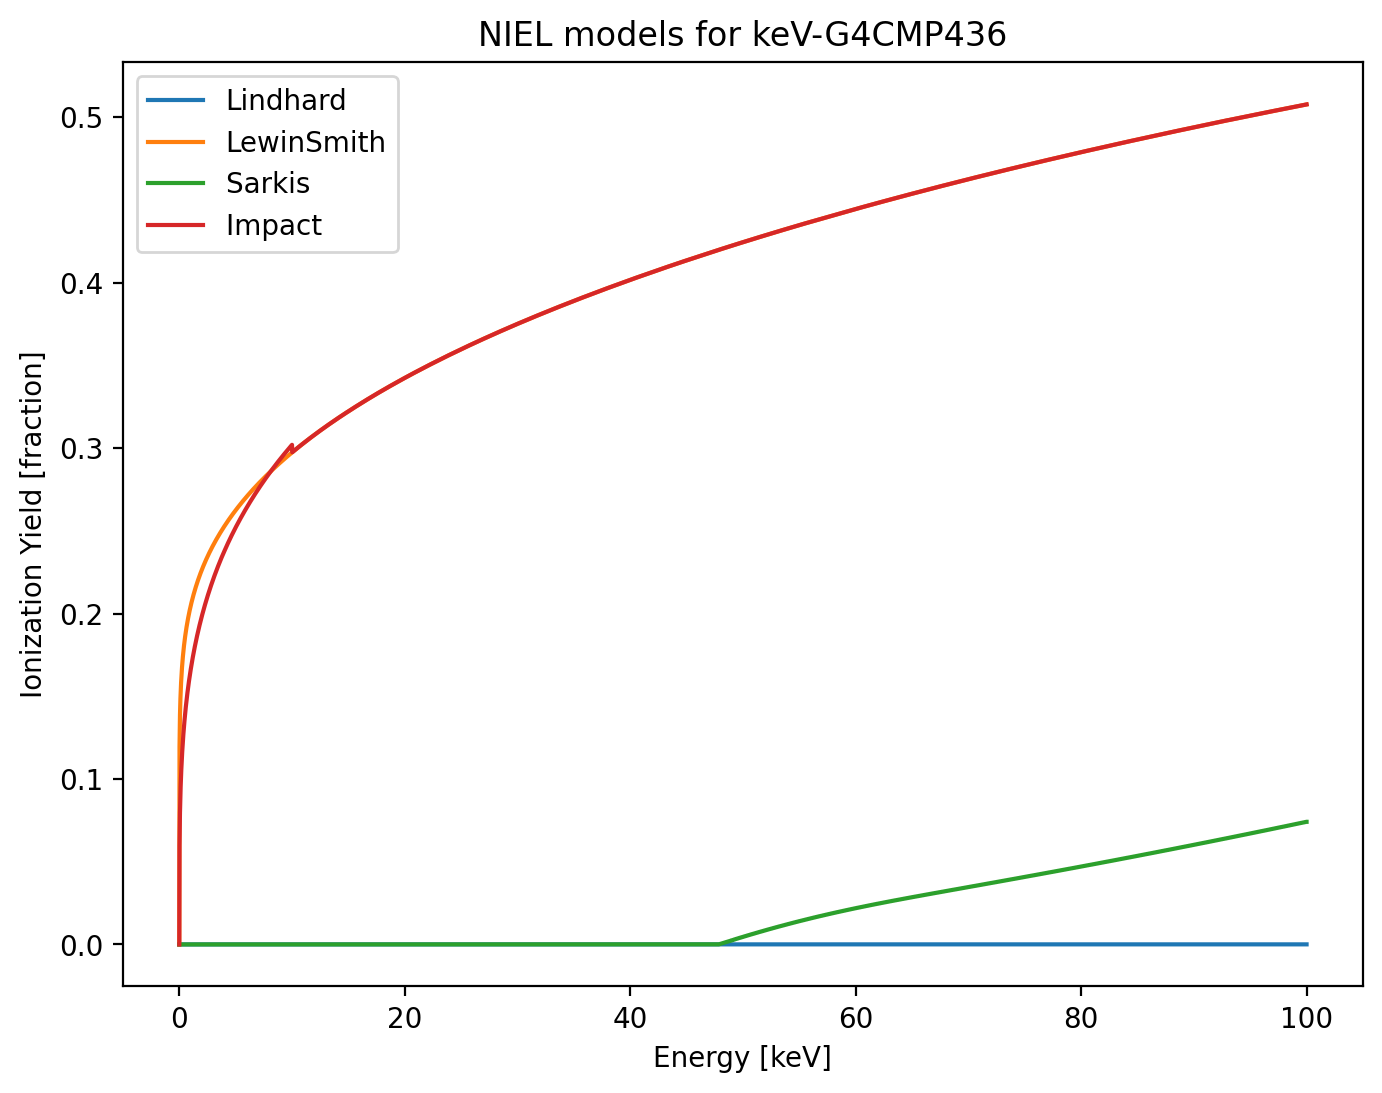

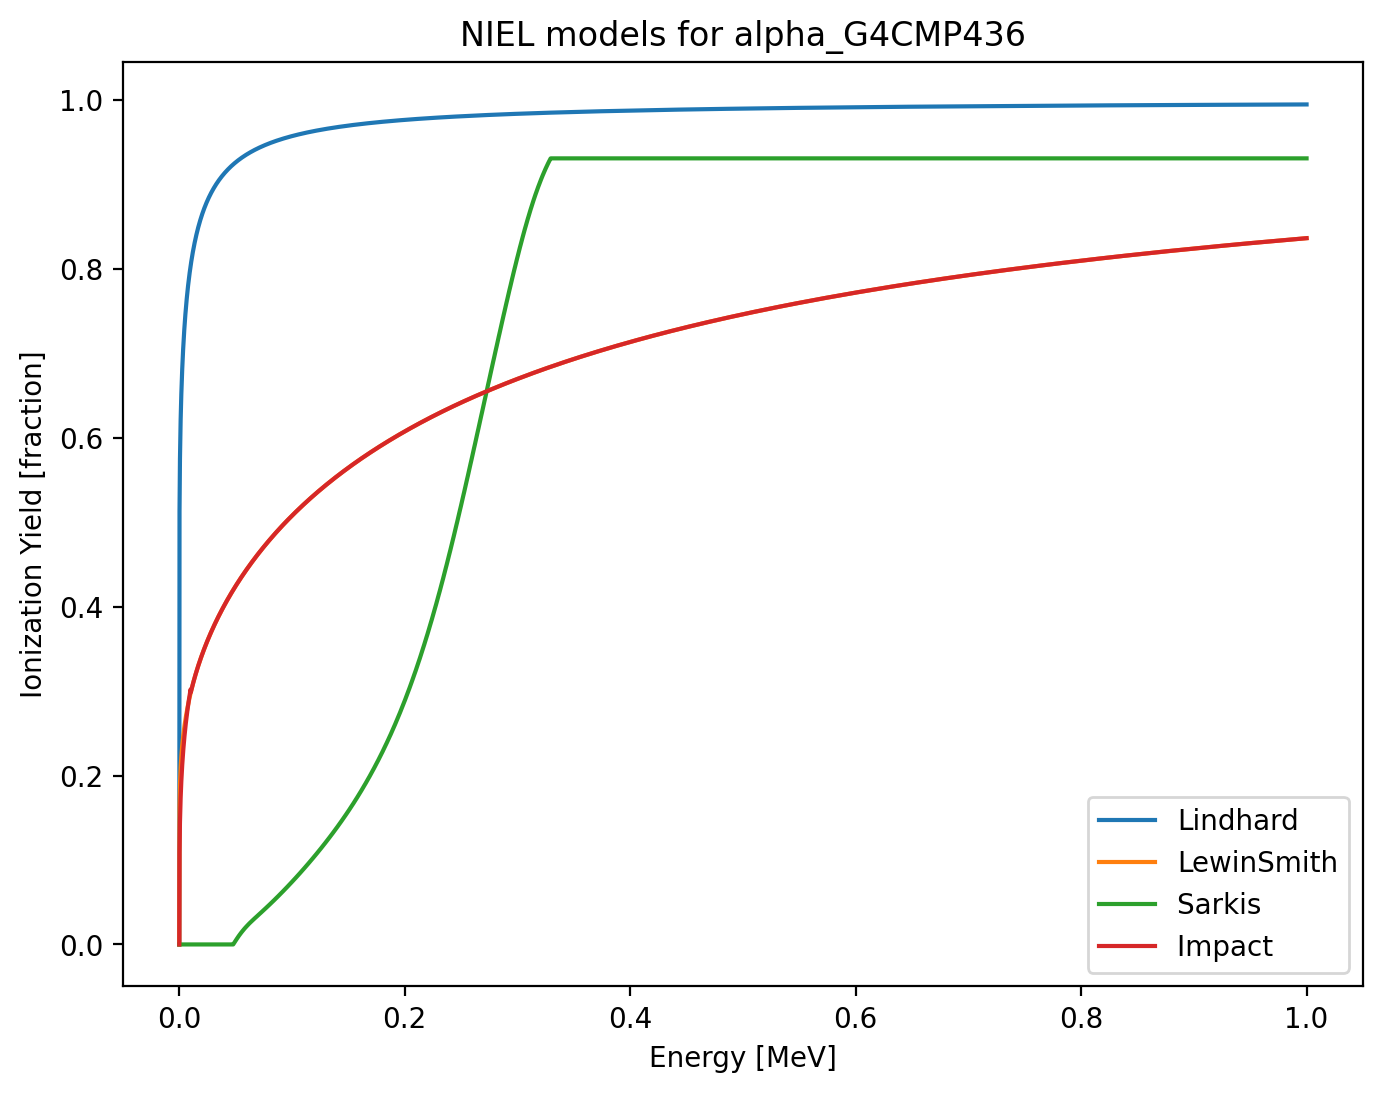

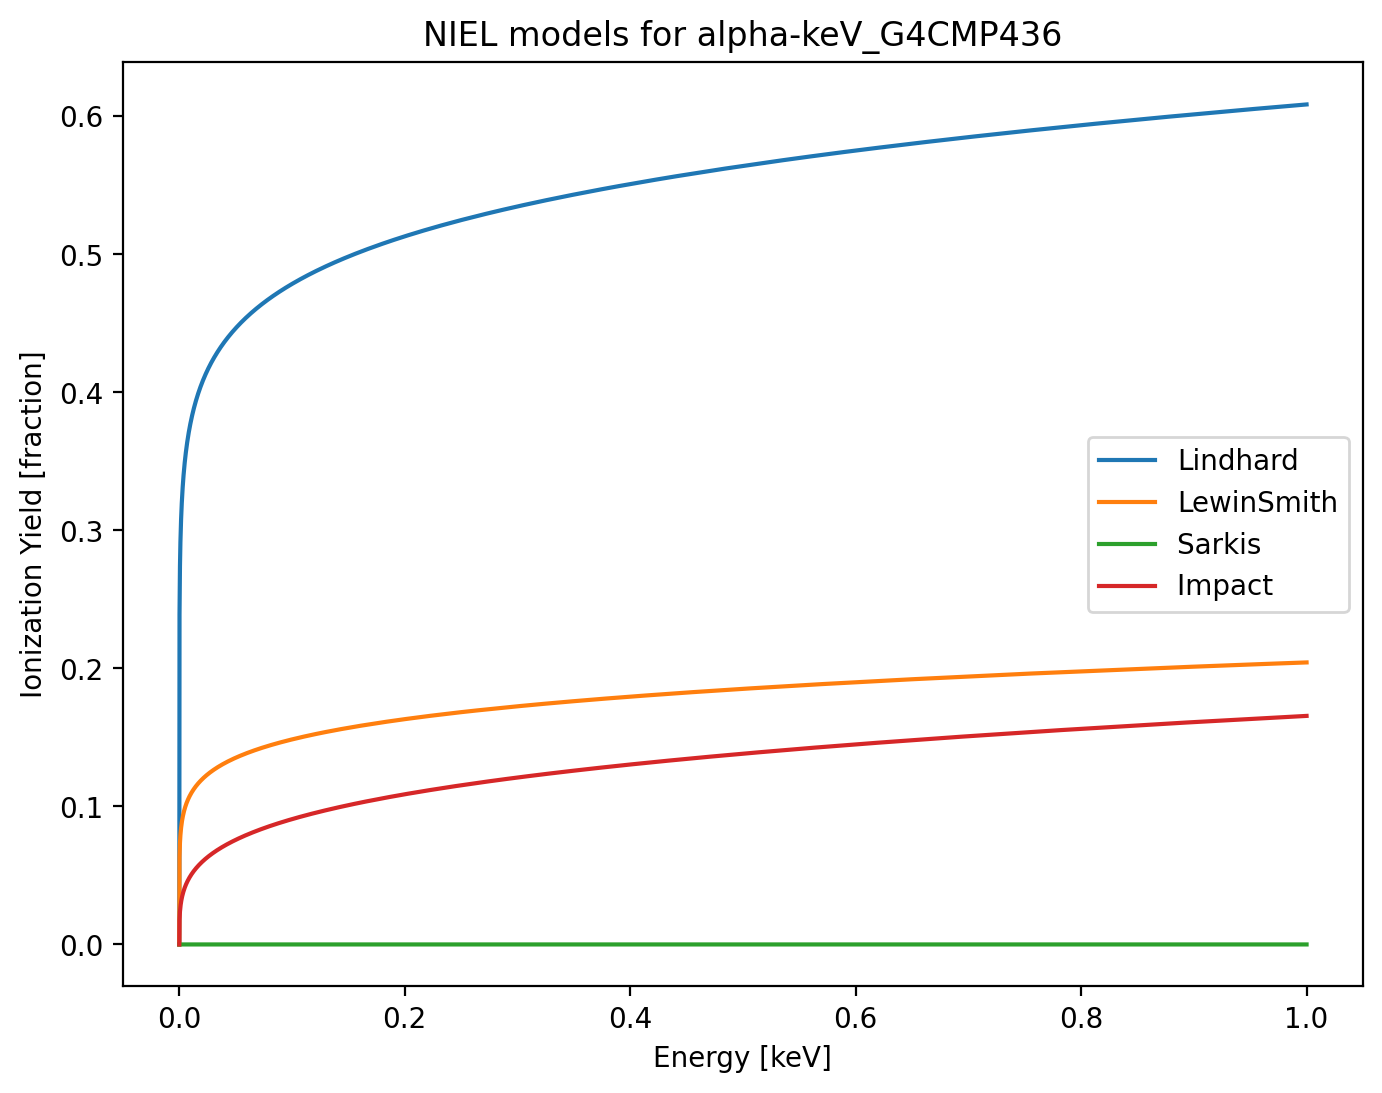

In [42]:
for name in names:
    plt.figure(figsize=(8,6),dpi=200)
    overlayFile(name)